In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
df= pd.read_csv('cardio_train.csv', sep=';')

In [44]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [46]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [47]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [48]:
df.drop(columns=['id'], inplace=True)

In [49]:
categorical_columns=['cholesterol', 'gluc', 'smoke', 'alco', 'active','cardio','gender']

In [50]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [51]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

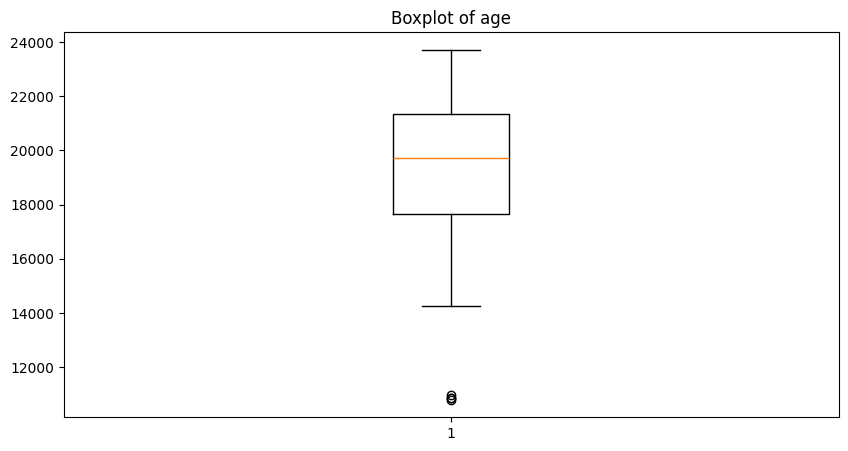

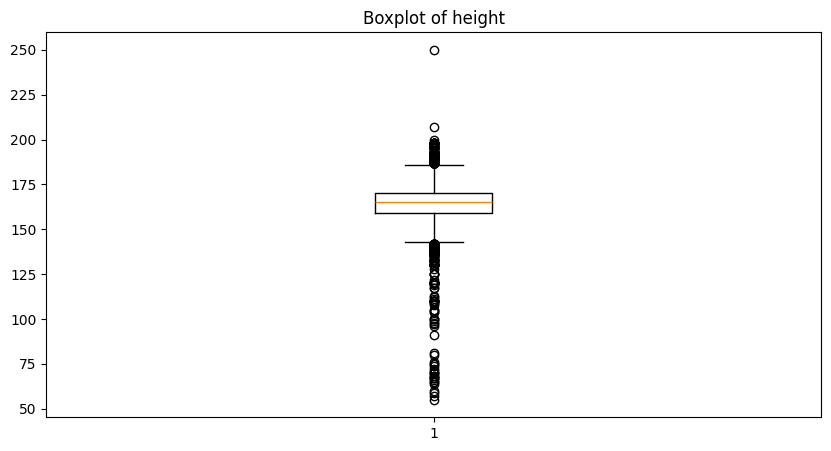

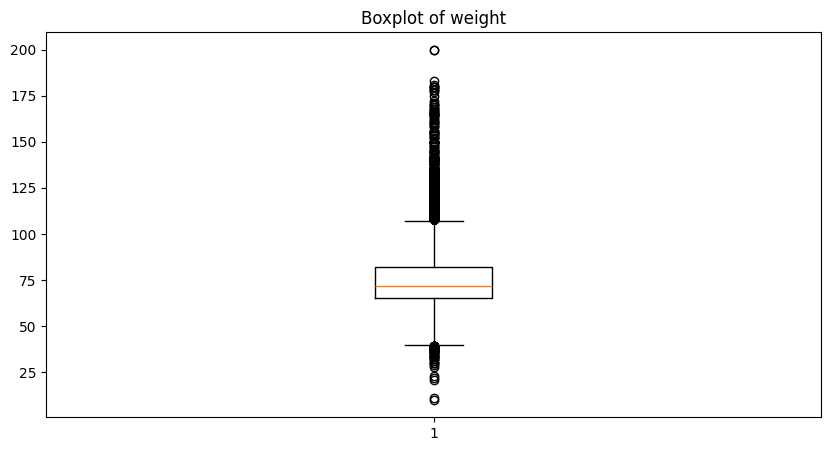

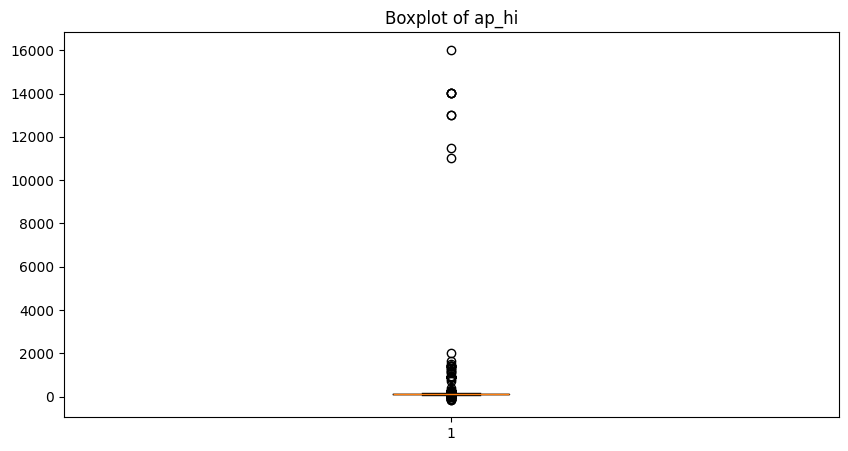

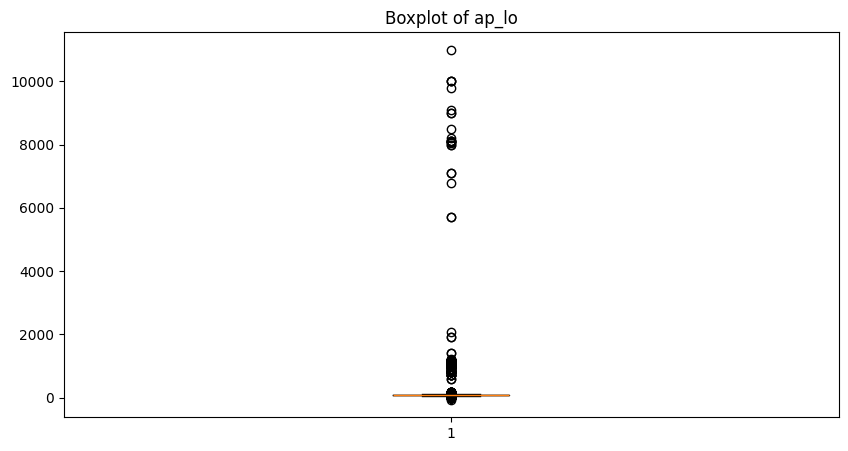

In [52]:
for i in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.title(f'Boxplot of {i}')
    plt.boxplot(df[i])
    plt.show() 

In [53]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for col in numerical_columns:
    df = remove_outliers(df, col)

In [54]:
df.shape

(62502, 12)

In [55]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [56]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

In [57]:
df['BMI'] = df['BMI'].astype('float64')

In [58]:
df['age'] = df['age'] // 365

In [59]:
df.drop(columns=['height', 'weight'], inplace=True)

In [60]:
df['MAP']= (df['ap_hi'] + 2*df['ap_lo'])/3

In [61]:
df.drop(columns=['ap_hi', 'ap_lo'], inplace=True)

In [62]:
df.dtypes

age               int64
gender         category
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
BMI             float64
MAP             float64
dtype: object

In [63]:
df

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,50,2,1,1,0,0,1,0,21.967120,90.000000
1,55,1,3,1,0,0,1,1,34.927679,106.666667
2,51,1,3,1,0,0,0,1,23.507805,90.000000
3,48,2,1,1,0,0,1,1,28.710479,116.666667
5,60,1,2,2,0,0,0,0,29.384676,93.333333
...,...,...,...,...,...,...,...,...,...,...
69993,53,1,1,1,0,0,1,1,23.661439,103.333333
69994,57,1,1,1,0,0,1,1,29.384757,103.333333
69995,52,2,1,1,1,0,1,0,26.927438,93.333333
69998,61,1,1,2,0,0,0,1,27.099251,98.333333


In [64]:
BMIbins = np.linspace(df['BMI'].min(),df['BMI'].max(), 6 )
MAPbins= np.linspace(df['MAP'].min(),df['MAP'].max(), 6 )
AgeBins= np.linspace(df['age'].min(),df['age'].max(), 6 )
AgeBins = AgeBins.astype(int)

In [65]:
MAPbins

array([ 73.33333333,  83.86666667,  94.4       , 104.93333333,
       115.46666667, 126.        ])

In [66]:
# AgeBins

In [67]:
#df['age']=pd.cut(df['age'], bins=AgeBins, labels=[1, 2, 3, 4, 5])

In [68]:
# BMIbins

In [69]:
#df['BMI']=pd.cut(df['BMI'], bins=BMIbins, labels=[1, 2, 3, 4,5])

In [70]:
# MAPbins

In [71]:
#df['MAP']=pd.cut(df['MAP'], bins=MAPbins, labels=[1, 2, 3, 4,5])

In [72]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['cardio'])
y = df['cardio']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression(max_iter=5000)

In [76]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [77]:
# make predictions on the test data
y_pred = model.predict(X_test)

In [78]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7244946936163404


In [304]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 1}
Accuracy: 0.7243880326382592
